In [2]:
%matplotlib notebook
%pylab
from scipy.integrate import quad
from scipy.special import erf

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


1.e) Verify that your formulation holds for the function 
$$u(x) = e^{x},$$ subject to boundary conditions
u(0) = 1, u(1) = e.

The function to be plotted is $$u(x) = \frac{1}{2} \int_{0}^{1}(|x-y|-x +2xy -y)e^{y}dy + 1 - x + xe$$

In [3]:
N = 16
a = 0; b = 1
h = 1/N 

x = zeros(N+1)
I = zeros(N+1)

#rhs
def f(x):
    return exp(x)

#Green's function
def G(x,y):
    return 0.5*(abs(x-y)-x+2*x*y-y)

#Qudrature Rule
for j in range(N+1):
    x[j] = j*h
    xj = x[j]
    Gf = lambda y: G(xj,y)*f(y)
    I[j] =  quad(Gf,a,b)[0] 
I = I + 1 - x +x*exp(1) 

<IPython.core.display.Javascript object>


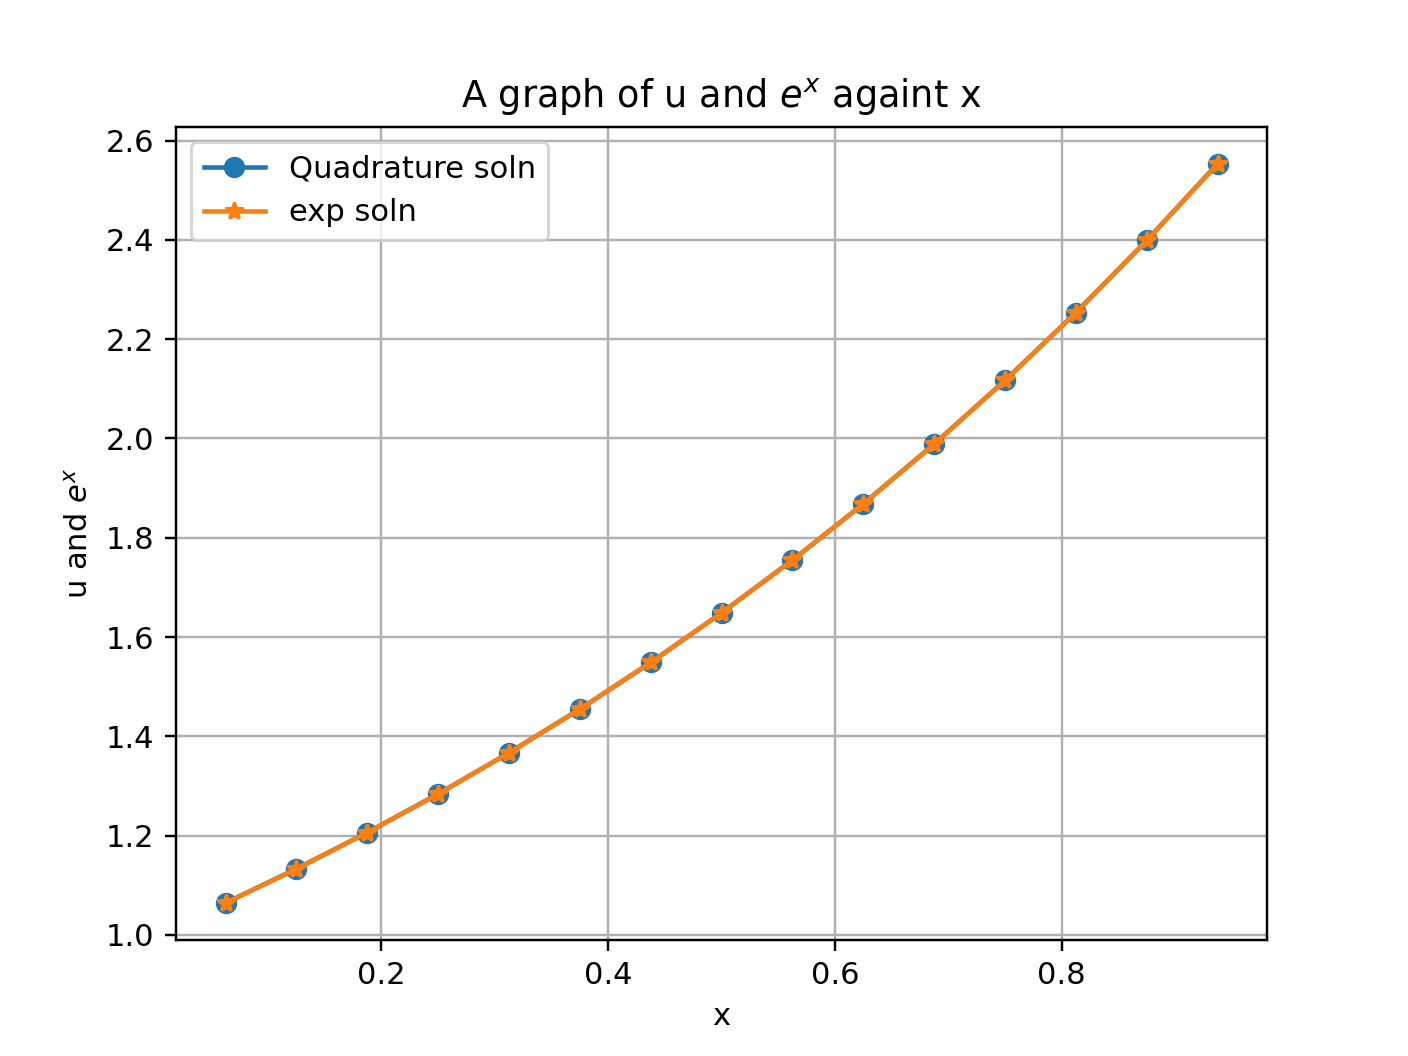

In [4]:
#ploting
figure(1)
clf()
plot(x[1:-1],I[1:-1],'-o',label='Quadrature soln')
plot(x[1:-1],exp(x[1:-1]),'-*',label='exp soln')
xlabel('x'); ylabel('u and $e^{x}$')
title('A graph of u and $e^{x}$ againt x')
grid()
legend()
show()

Hence the formulation holds, since the solution is well approximated


2.d) Sketch a plot of the resulting solution over the interval $[−1, 3]$

<IPython.core.display.Javascript object>


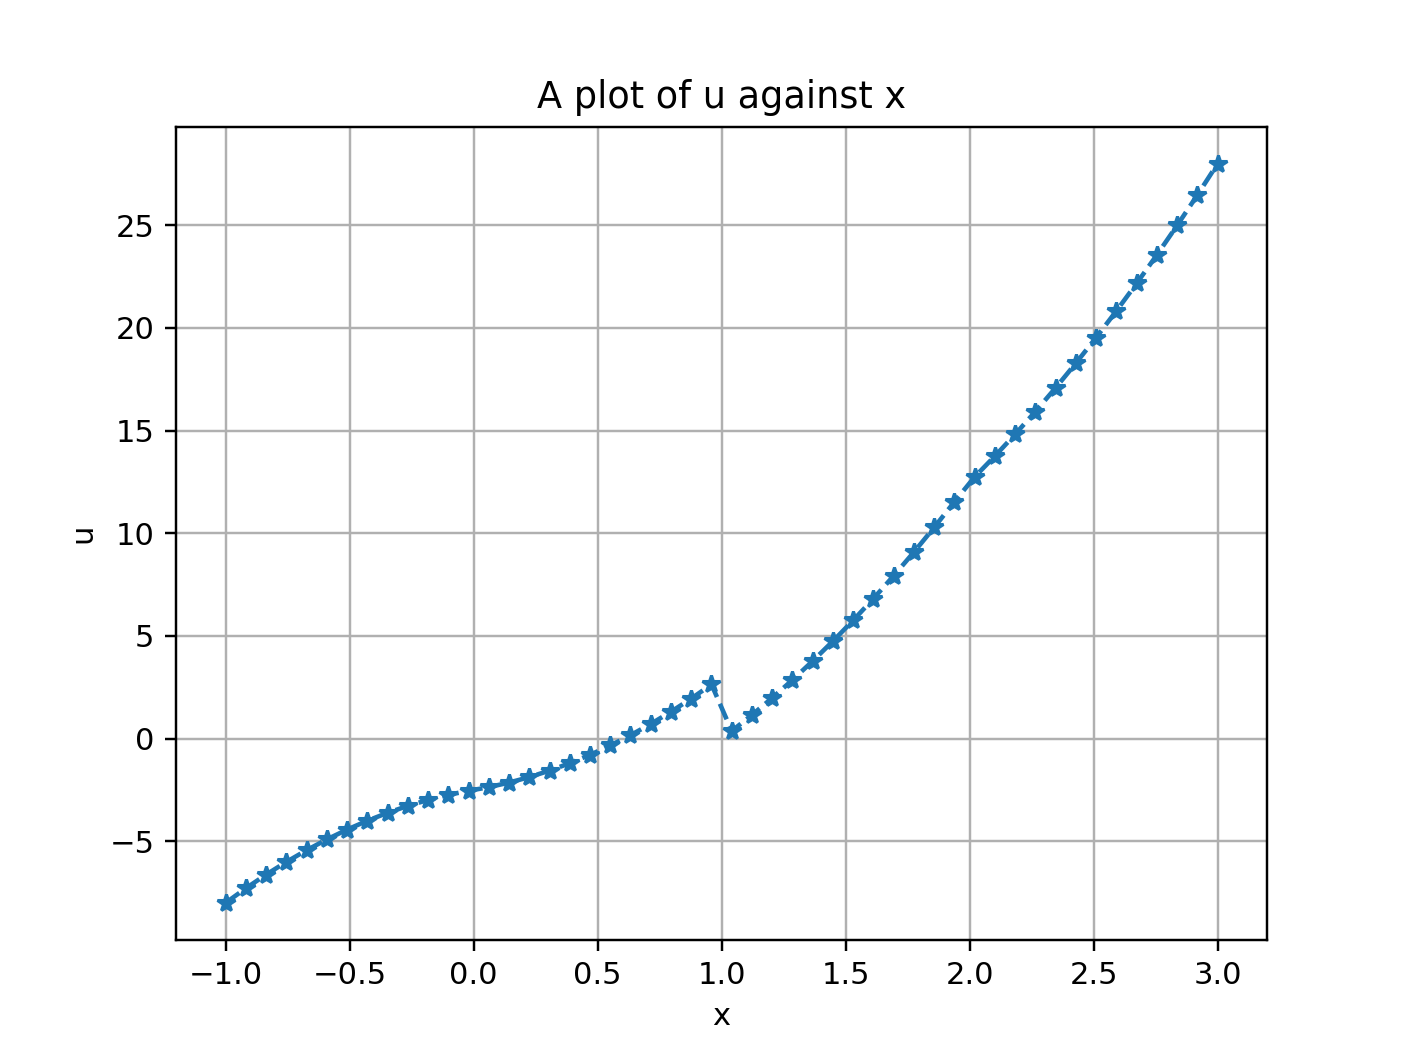

In [5]:
a = -1; b = 3
x = linspace(a,b)

b = array([2,6,0])
A = array([[1,1,2],[1,1,1],[1,-1,-1]])
y = linalg.solve(A,b)

def u(x):
    A = y[0]*(1-x)/(2*abs(x-1))
    B = y[1]*(x/2*abs(x))
    C = y[2]*(0.5*abs(x-2))
    return A + B + C

figure(2)
plot(x,u(x),'--*')
xlabel("x")
ylabel("u")
title('A plot of u against x')
grid()
show()

There is a jump, before and after $x = 1$

2.e)  Solve the problem
$$u^{''}(x) = e^{x}$$
$\forall~ x \in [0,1]$ 
subject to u(0) = 1 and u(1) = e, using a volume integral plus a distribution of sources and dipoles.


In [6]:
def u(x):
    b = array([2,2*exp(1),0])
    A = array([[1,1,2],[1,1,1],[1,-1,-1]])
    y = linalg.solve(A,b)
    A = y[0]*((1-x)/(2*abs(x-1)))
    B = y[1]*(x/(2*abs(x)))
    C = y[2]*((0.5*abs(x-2)))
    return A + B + C

In [7]:
N = 16
a = -.1; b = 1.1
h = ((b-a)/N) 

x = zeros(N+1)
I = zeros(N+1)

#rhs
def f(x):
    return exp(x)

#Green's function
def G(x,y):
    return 0.5*(abs(x-y)-x+2*x*y-y)


#Qudrature Rule
for j in range(N+1):
    x[j] = j*h
    xj = x[j]
    Gf = lambda y: G(xj,y)*f(y)
    I[j] =  quad(Gf,a,b)[0] 
I = I + u(x)

<ipython-input-6-8ea98c7eb7bb>:6: RuntimeWarning: invalid value encountered in true_divide
  B = y[1]*(x/(2*abs(x)))


<IPython.core.display.Javascript object>


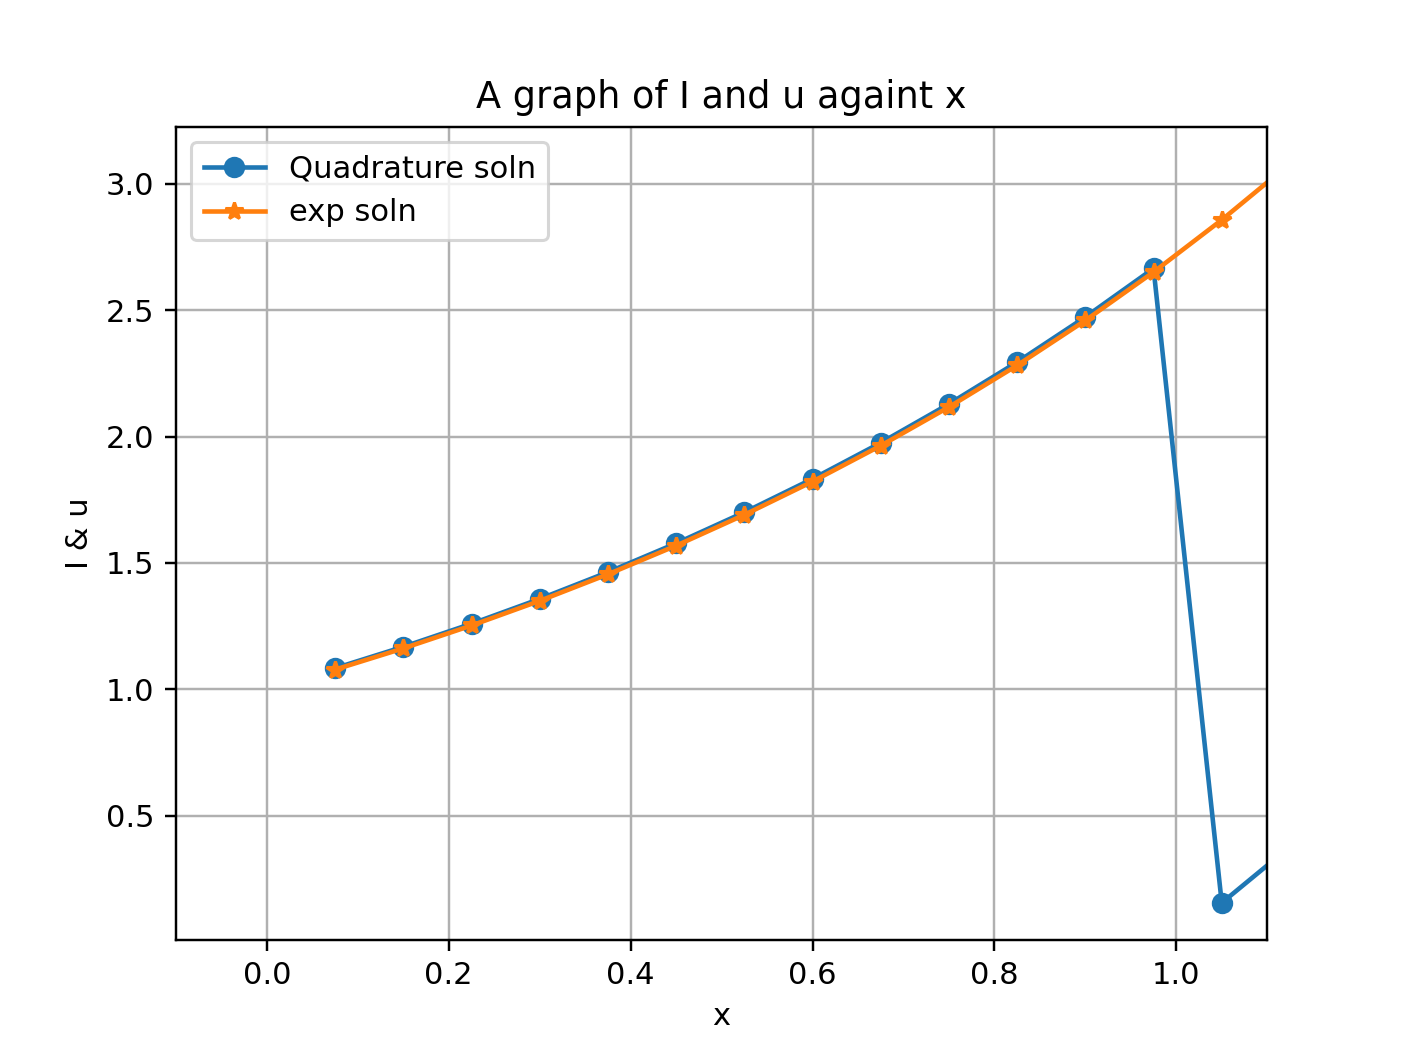

In [8]:
#plotting
figure(3)
clf()
plot(x[1:-1],I[1:-1],'-o',label='Quadrature soln')
plot(x[1:-1],exp(x[1:-1]),'-*',label='exp soln')
xlabel('x'); ylabel('I & u')
title('A graph of I and u againt x')
xlim(-0.1,1.1)
grid()
legend()
show()

Hence the solution has the correct jump behavior at x = 0 and x = 1.